In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Getting data

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

### Covid19 confirmed cases globally until Dec 01, 2021

In [4]:
df1

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,155940,155944,156040,156071,156124,156166,156196,156210,156250,156284,156307,156323,156363,156392,156397,156397,156397,156397,156414,156456,156487,156510,156552,156610,156649,156739,156739,156812,156864,156896,156911,157015,157032,157144,157171,157190,157218,157260,157289,157359
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,181252,181696,181960,182610,183282,183873,184340,184887,185300,185497,186222,186793,187363,187994,187994,189125,189355,190125,190815,191440,192013,192600,193075,193269,193856,194472,195021,195523,195988,195988,196611,197167,197776,198292,198732,199137,199555,199750,199945,200173
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,205750,205822,205903,205990,206069,206160,206270,206358,206452,206566,206649,206754,206878,206995,207079,207156,207254,207385,207509,207624,207764,207873,207970,208104,208245,208380,208532,208695,208839,208952,209111,209283,209463,209624,209817,209980,210152,210344,210531,210723
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15404,15404,15425,15425,15462,15505,15516,15516,15516,15516,15516,15572,15618,15618,15618,15618,15705,15717,15744,15744,15819,15819,15819,15907,15929,15972,16035,16086,16086,16086,16299,16342,16426,16566,16712,16712,16712,16712,17115,17426
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,63775,63861,63930,64033,64126,64226,64301,64374,64433,64458,64487,64533,64583,64612,64654,64674,64724,64762,64815,64857,64875,64899,64913,64913,64940,64968,64985,64997,65011,65024,65033,65061,65080,65105,65130,65139,65144,65155,65168,65183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,884895,888940,892579,896174,900585,905477,910376,915603,921122,926720,932357,939463,946043,953547,961038,968684,976672,984805,992735,1000897,1009879,1018346,1026522,1035138,1045397,1055246,1065469,1075094,1084625,1094514,1104835,1143967,1155778,1168228,1181337,1197404,1210340,1224110,1238082,1252590
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,450310,450310,451459,451897,452272,452642,452997,452997,452997,453782,454172,454509,454799,455099,455099,455099,455689,455949,456186,456407,456632,456632,456632,457154,457390,457477,457729,457950,457950,457950,458448,458698,458956,459213,459479,459479,459479,460053,460053,460799
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9662,9678,9694,9711,9728,9751,9773,9779,9791,9799,9806,9810,9831,9843,9858,9870,9883,9891,9902,9907,9912,9918,9918,9936,9936,9947,9950,9954,9955,9955,9961,9967,9972,9977,9979,9981

# Data Cleaning

Dropping the columns like *'Province/State'*, *'Lat'*, *'Long'* as they are irrelevant to the data.  And aggregating all data to sum up the number of confirmed cases in every *'Country/Region'* using *groupby*.

In [5]:
df1 = df1.drop(columns=['Province/State','Lat', 'Long'])
df1 = df1.groupby('Country/Region').sum()
df1

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,...,155940,155944,156040,156071,156124,156166,156196,156210,156250,156284,156307,156323,156363,156392,156397,156397,156397,156397,156414,156456,156487,156510,156552,156610,156649,156739,156739,156812,156864,156896,156911,157015,157032,157144,157171,157190,157218,157260,157289,157359
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,181252,181696,181960,182610,183282,183873,184340,184887,185300,185497,186222,186793,187363,187994,187994,189125,189355,190125,190815,191440,192013,192600,193075,193269,193856,194472,195021,195523,195988,195988,196611,197167,197776,198292,198732,199137,199555,199750,199945,200173
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,205750,205822,205903,205990,206069,206160,206270,206358,206452,206566,206649,206754,206878,206995,207079,207156,207254,207385,207509,207624,207764,207873,207970,208104,208245,208380,208532,208695,208839,208952,209111,209283,209463,209624,209817,209980,210152,210344,210531,210723
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15404,15404,15425,15425,15462,15505,15516,15516,15516,15516,15516,15572,15618,15618,15618,15618,15705,15717,15744,15744,15819,15819,15819,15907,15929,15972,16035,16086,16086,16086,16299,16342,16426,16566,16712,16712,16712,16712,17115,17426
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,63775,63861,63930,64033,64126,64226,64301,64374,64433,64458,64487,64533,64583,64612,64654,64674,64724,64762,64815,64857,64875,64899,64913,64913,64940,64968,64985,64997,65011,65024,65033,65061,65080,65105,65130,65139,65144,65155,65168,65183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,884895,888940,892579,896174,900585,905477,910376,915603,921122,926720,932357,939463,946043,953547,961038,968684,976672,984805,992735,1000897,1009879,1018346,1026522,1035138,1045397,1055246,1065469,1075094,1084625,1094514,1104835,1143967,1155778,1168228,1181337,1197404,1210340,1224110,1238082,1252590
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,450310,450310,451459,451897,452272,452642,452997,452997,452997,453782,454172,454509,454799,455099,455099,455099,455689,455949,456186,456407,456632,456632,456632,457154,457390,457477,457729,457950,457950,457950,458448,458698,458956,459213,459479,459479,459479,460053,460053,460799
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9662,9678,9694,9711,9728,9751,9773,9779,9791,9799,9806,9810,9831,9843,9858,9870,9883,9891,9902,9907,9912,9918,9918,9936,9936,9947,9950,9954,9955,9955,9961,9967,9972,9977,9979,9981,9987,9995,10004,10006


# Creating Datetime index

First, transposing the dataframe

In [6]:
df1=df1.T
df1

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11/27/21,157190,199137,209980,16712,65139,4141,5325560,337522,207984,1132805,584121,22734,277552,1575579,24769,650168,1701633,30165,24850,2636,535115,272798,194909,22076863,14992,688628,15711,521211,20386,38358,120064,106794,1792561,11708,5107,1757077,111132,5063177,4489,18837,...,6401,261636,1143068,415898,20,23016,2958548,12717,5131012,561778,42056,865,50741,1198848,986834,47764,16578,17493,26261,2100959,19822,26241,1,69680,717163,8726370,48201079,127423,3580671,741858,10165779,399181,192599,6,430046,1197404,459479,9981,210138,133836
11/28/21,157218,199555,210152,16712,65144,4141,5326448,337931,209139,1143283,585783,22734,277585,1575784,24923,651839,1701633,30165,24850,2640,536472,272798,194909,22080906,14992,689356,15711,521561,20386,38362,120087,106794,1794286,11708,5107,1759405,111176,5065373,4498,18837,...,6401,262383,1152125,417376,20,23016,2961406,12717,5131012,562520,42056,865,50760,1198848,986834,47965,16588,17493,26261,2106813,19822,26241,1,70136,717258,8748025,48241903,127451,3588916,741918,10202370,399348,192831,6,430696,1210340,459479,9987,210143,133951
11/29/21,157260,199750,210344,16712,65155,4141,5328416,338120,210238,1151809,586640,22763,277628,1576011,25152,653323,1749469,30338,24850,2640,536472,274219,195068,22084749,15058,692376,15711,521931,20415,38367,120112,106794,1798515,11708,5107,1761365,111218,5067348,4498,18905,...,6402,263486,1159767,418413,20,23016,2963679,12755,5153923,563267,42826,865,50823,1198848,1006239,48068,16596,17493,26261,2111566,19822,26250,1,70598,717309,8772342,48438876,127523,3595410,741976,10245244,399504,193065,6,431296,1224110,460053,9995,210150,134226
11/30/21,157289,199945,210531,17115,65168,4141,5330748,338518,211655,1159995,588318,22791,277690,1576284,25316,654718,1766035,30431,24850,2640,537559,275065,195068,22094459,15058,695057,16000,522402,20415,38370,120134,106794,1800867,11708,5107,1762751,111337,5069644,4501,18970,...,6402,264725,1170200,420898,20,23016,2968052,12758,5164184,563989,43084,865,50848,12

The index column is still a *'string'* type. Changing it into *'Datetime'* format using *pd.to_datetime* and *pd.DatetimeIndex*

In [7]:
df1.index = pd.to_datetime(df1.index, infer_datetime_format=True)
df1

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-27,157190,199137,209980,16712,65139,4141,5325560,337522,207984,1132805,584121,22734,277552,1575579,24769,650168,1701633,30165,24850,2636,535115,272798,194909,22076863,14992,688628,15711,521211,20386,38358,120064,106794,1792561,11708,5107,1757077,111132,5063177,4489,18837,...,6401,261636,1143068,415898,20,23016,2958548,12717,5131012,561778,42056,865,50741,1198848,986834,47764,16578,17493,26261,2100959,19822,26241,1,69680,717163,8726370,48201079,127423,3580671,741858,10165779,399181,192599,6,430046,1197404,459479,9981,210138,133836
2021-11-28,157218,199555,210152,16712,65144,4141,5326448,337931,209139,1143283,585783,22734,277585,1575784,24923,651839,1701633,30165,24850,2640,536472,272798,194909,22080906,14992,689356,15711,521561,20386,38362,120087,106794,1794286,11708,5107,1759405,111176,5065373,4498,18837,...,6401,262383,1152125,417376,20,23016,2961406,12717,5131012,562520,42056,865,50760,1198848,986834,47965,16588,17493,26261,2106813,19822,26241,1,70136,717258,8748025,48241903,127451,3588916,741918,10202370,399348,192831,6,430696,1210340,459479,9987,210143,133951
2021-11-29,157260,199750,210344,16712,65155,4141,5328416,338120,210238,1151809,586640,22763,277628,1576011,25152,653323,1749469,30338,24850,2640,536472,274219,195068,22084749,15058,692376,15711,521931,20415,38367,120112,106794,1798515,11708,5107,1761365,111218,5067348,4498,18905,...,6402,263486,1159767,418413,20,23016,2963679,12755,5153923,563267,42826,865,50823,1198848,1006239,48068,16596,17493,26261,2111566,19822,26250,1,70598,717309,8772342,48438876,127523,3595410,741976,10245244,399504,193065,6,431296,1224110,460053,9995,210150,134226
2021-11-30,157289,199945,210531,17115,65168,4141,5330748,338518,211655,1159995,588318,22791,277690,1576284,25316,654718,1766035,30431,24850,2640,537559,275065,195068,22094459,15058,695057,16000,522402,20415,38370,120134,106794,1800867,11708,5107,1762751,111337,5069644,4501,18970,...,6402,264725,1170200,420898,20,23016,2968052,12758,5164184,56

# Exploring and Visualizing the Data

To know the confirmed number of cases in every country on the *1st* date of every month

In [8]:
df1[df1.index.day == 1]

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-02-01,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4,0,0,0,11891,0,0,0,...,0,16,0,0,0,0,0,0,1,1,0,0,0,1,0,0,10,0,0,19,0,0,0,0,0,0,8,0,0,4,2,0,0,0,0,6,0,0,0,0
2020-03-01,5,0,1,0,0,0,0,1,27,14,3,0,47,0,0,1,2,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,26,0,0,9,79932,0,0,0,...,0,106,0,0,0,0,0,0,84,1,0,0,0,14,27,0,40,0,0,42,0,0,0,0,0,0,32,0,0,21,94,0,0,0,0,16,0,0,0,0
2020-04-01,192,259,847,390,8,7,1054,571,4862,10711,359,21,569,54,34,163,13964,3,13,4,115,459,4,6836,131,422,282,15,2,6,109,233,10527,3,7,3137,82361,1065,0,19,...,2,1000,400,841,0,5,1380,0,104118,146,7,0,10,5320,17768,10,329,0,20,1771,1,36,0,90,423,15679,224311,44,794,814,43789,350,181,0,143,218,134,0,36,8
2020-05-01,2171,782,4154,745,30,25,4532,2148,6778,15531,1854,81,3170,8238,81,14917,49032,18,90,7,1229,1781,23,92202,138,1555,649,151,11,122,122,1832,58549,72,73,18687,83959,7006,1,229,...,136,17101,1403,1434,0,601,5951,45,215216,690,442,0,10,22133,29705,44,429,15,480,2960,24,123,0,116,998,122392,1115995,85,10861,13038,183501,648,2086,0,335,270,353,7,109,40
2020-06-01,15836,1143,9513,765,86,26,17415,9492,7221,16733,5662,102,11871,49534,92,43403,58517,18,243,43,10531,2524,38,526447,141,2519,847,228,63,458,125,6397,93330,1069,790,129020,84154,30493,106,611,...,865,35292,1522,1473,0,2023,34357,994,239638,1643,5026,0,44,39309,30871,123,443,3930,509,3082,24,443,0,117,1084,164769,1816107,457,24562,35192,258983,825,3702,0,1662,328,449,354,1089,203
2020-07-01,31848,2580,14272,855,291,69,67197,26065,8001,17873,18112,104,27414,149258,97,62424,61509,28,1199,77,34227,4606,227,1448753,141,5154,962,303,170,1267,141,12592,106227,3745,866,282043,84816,102009,303,1382,...,1498,44122,1687,1613,0,2924,159333,2021,249659,2054,9500,0,535,68608,31851,293,447,5954,509,3173,24,661,0,130,1175,201098,2694046,893,45924,49069,285279,943,8781,0,6062,355,2758,1190,1632,605
2020-08-01,36796,5396,30950,925,1164,91,196543,38841,17895,21212,32157,599,41190,239860,122,67946,69402,56,1805,102,78793,11876,804,2707877,141,11836,1143,353,395,2480,240,17255,118523,4614,936,357658,87827,306181,386,3200,...,1823,52512,2337,2171,0,3212,503290,2352,288522,2815,11644,0,1760,77379,35412,780,474,7409,509,3312,24,958,0,173,1552,231869,4625471,1176,72609,60760,305562,1278,24783,0,19443,590,12160,1730,6228,3659
2020-09-01,38282,9606,44833,1184,2729,94,428239,43878,25923,27642,36578,2276,52440,314946,176,71962,85487,1050,2145,227,117267,20234,1724,3950931,144,16454,1370,919,445,3970,274,19409,131385,4711,1017,413145,89933,624026,427,3979,...,2028,56852,3989,2924,0,3310,628259,2527,470973,3092,13189,0,4089,84521,42393,2830,488,8583,509,3417,27,1416,0,1797,3963,271705,6068403,3037,126279,70805,339415,1611,42127,0,47756,1044,23281,1962,12381,6559
2020-10-01,39371,13806,51690,2050,5114,101,765002,50850,27109,45686,40309,4123,71374,364987,193,79019,121059,1992,2357,282,135716,27749,3172,4847092,146,20833,2088,14383,510,6126,278,20838,164583,4829,1203,464750,90567,835339,484,5089,...,2238,57784,10938,5865,0,3593,676084,2704,778607,3382,13653,0,4891,93615,53832,4247,515,9769,509,3575,28,1809,0,4570,18413,320070,7280478,8287,218625,95348,462777,2061,57190,0,76029,1095,40322,2039,14802,7850
2020-11-01,41425,21202,58272,4825

To know the confirmed number of cases in each country in the months of *August* since the pandemic started

In [9]:
df1[df1.index.month == 8]

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-08-01,36796,5396,30950,925,1164,91,196543,38841,17895,21212,32157,599,41190,239860,122,67946,69402,56,1805,102,78793,11876,804,2707877,141,11836,1143,353,395,2480,240,17255,118523,4614,936,357658,87827,306181,386,3200,...,1823,52512,2337,2171,0,3212,503290,2352,288522,2815,11644,0,1760,77379,35412,780,474,7409,509,3312,24,958,0,173,1552,231869,4625471,1176,72609,60760,305562,1278,24783,0,19443,590,12160,1730,6228,3659
2020-08-02,36796,5519,31465,925,1199,91,201919,39050,18318,21304,32443,648,41536,240746,132,68067,69849,57,1805,102,80153,12296,804,2733677,141,11955,1143,353,395,2547,240,17255,118719,4614,936,359731,87985,317651,386,3200,...,1843,52825,2344,2180,0,3220,511485,2429,288522,2823,11738,0,1849,77417,35550,809,475,7451,509,3317,24,961,0,182,1561,232856,4671478,1182,73761,60999,306309,1286,25336,0,20206,621,12297,1734,6347,3921
2020-08-03,36796,5620,31972,937,1280,92,206743,39102,18730,21385,32684,679,41835,242102,132,68166,70314,57,1805,103,81846,12462,804,2750318,141,12159,1150,355,395,2583,240,17255,118945,4614,936,361493,88099,327850,386,3546,...,1848,53051,2354,2181,0,3220,516862,2429,297054,2828,11738,0,1893,77582,35616,847,474,7495,509,3320,24,976,0,182,1565,233851,4716762,1195,74781,61163,307251,1291,26066,0,20754,652,12541,1734,6580,4075
2020-08-04,36833,5750,32504,939,1344,92,213535,39298,19445,21481,32910,715,42132,244020,132,68250,70648,57,1914,105,83361,12856,804,2801921,141,12414,1153,356,395,2631,243,17718,119658,4618,938,362962,88206,334979,388,3546,...,1855,53346,2368,2190,0,3220,521318,2437,302814,2834,11780,0,1981,77916,35746,892,476,7538,509,3321,25,988,0,194,1584,234934,4771736,1203,75880,61352,307926,1300,27047,0,21438,672,12770,1760,6793,4221
2020-08-05,36915,5889,33055,939,1395,92,220682,39586,19890,21566,33103,751,42514,246674,133,68376,71158,86,1936,105,85141,13138,804,2859073,141,12717,1153,357,395,2689,243,17718,120002,4618,939,364723,88328,345714,388,3546,...,1860,54254,2417,2208,0,3227,529877,2437,305767,2839,11780,0,2050,78341,35927,944,476,7583,509,3328,25,1001,0,199,1601,236112,4827619,1213,77169,61606,308832,1309,27793,0,22299,717,13065,1763,7022,4221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-27,152960,143174,194186,15025,46929,1598,5167733,240261,49935,683219,409745,17940,272148,1486153,4789,476265,1177909,16012,13366,2592,488933,212306,153793,20703906,2380,450144,13754,386202,11818,35079,91369,83425,1494397,11270,4989,1636627,106943,4901163,4055,13533,...,6363,66928,779136,265703,20,17016,2747018,11365,4831809,416961,37699,744,28462,1123413,770765,27436,15954,17096,1367,1139571,15960,20698,0,43999,654798,6311607,38819716,119327,2376571,714396,6697770,384531,153204,4,329736,410366,334472,7711,205704,124236
2021-08-28,153007,144079,194671,15025,47079,1638,5171458,240953,51256,684541,413986,17940,272246,1489589,4881,477901,1177909,16012,13366,2594,489802,212306,153793,20728605,2380,451148,13759,38913

To know the number of confirmed cases from March 01 to August 01 in the year 2020

In [10]:
df1['2020-03-01':'2020-08-01']

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-03-01,5,0,1,0,0,0,0,1,27,14,3,0,47,0,0,1,2,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,26,0,0,9,79932,0,0,0,...,0,106,0,0,0,0,0,0,84,1,0,0,0,14,27,0,40,0,0,42,0,0,0,0,0,0,32,0,0,21,94,0,0,0,0,16,0,0,0,0
2020-03-02,5,0,3,1,0,0,0,1,30,18,3,0,49,0,0,1,8,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,32,0,0,9,80136,0,0,0,...,0,108,0,0,0,0,0,0,120,1,0,0,0,19,42,0,41,0,0,43,0,0,0,0,0,0,55,0,0,21,134,0,0,0,0,16,0,0,0,0
2020-03-03,5,0,5,1,0,0,1,1,39,21,3,0,49,0,0,1,13,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,37,0,0,10,80261,0,0,0,...,0,110,0,0,0,0,0,0,165,1,0,0,0,32,56,0,42,0,0,43,0,0,0,0,0,0,74,0,1,27,189,0,0,0,0,16,0,0,0,0
2020-03-04,5,0,12,1,0,0,1,1,52,29,3,0,52,0,0,6,23,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,42,0,0,10,80386,0,0,0,...,0,110,0,0,0,0,0,0,222,1,0,0,0,62,90,0,42,0,0,43,0,0,0,0,1,0,107,0,1,27,246,0,0,0,0,16,0,0,0,0
2020-03-05,5,0,12,1,0,0,1,1,55,41,6,0,55,0,0,6,50,0,0,0,0,2,0,4,0,0,0,0,0,0,1,0,46,0,0,13,80537,0,0,0,...,0,117,0,2,0,0,1,0,259,1,0,0,0,87,114,0,44,0,0,47,0,0,0,0,1,0,184,0,1,29,295,0,0,0,0,16,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-28,36454,4997,28615,907,1000,86,173355,37629,15582,20677,30858,447,39921,229185,110,67366,66662,48,1770,99,72327,10766,739,2483191,141,10871,1105,351,378,2354,226,17179,116838,4599,926,349800,86990,267385,354,3200,...,1786,51197,2204,2101,0,3212,459761,2305,280610,2810,11496,0,1510,76215,34609,694,467,7235,509,3297,24,896,0,153,1468,227982,4361529,1135,68030,59546,302261,1218,21699,0,16571,446,10938,1703,5002,2817
2020-07-29,36557,5105,29229,918,1078,91,178996,37937,16298,20850,31221,484,40311,232194,110,67518,67335,48,1805,99,73534,11127,804,2552265,141,11155,1105,351,387,2373,226,17255,117325,4605,926,351575,87213,276055,378,3200,...,1803,51531,2245,2115,0,3212,471123,2322,282641,2810,11579,0,1607,76516,34802,717,467,7276,509,3298,24,896,0,156,1488,228924,4429904,1140,69078,59921,303063,1237,22585,0,17158,459,11284,1711,5249,2879
2020-07-30,36628,5197,29831,922,1109,91,185373,38196,16903,20955,31560,508,40755,234889,110,67665,68006,48,1805,101,75234,11444,804,2610102,141,11420,1106,353,387,2418,234,17255,117740,4605,935,353536,87489,286020,378,3200,...,1818,51809,2265,2139,0,3212,482169,2322,285430,2814,11579,0,1607,76818,35022,738,467,7320,509,3304,24,908,0,164,1514,229891,4497870,1147,70300,60223,303910,1243,23271,0,17859,509,11548,1726,5555,3092
2020-07-31,36628,5276,30394,925,1148,91,191302,38550,17280,21130,31878,574,40982,237661,110,67808,68751,48,1805,101,76789,11876,804,2662485,141,11690,1106,353,387,2451,239,17255,118297,4608,936,355667,87655,295508,378,3200,...,1823,52205,2292,2156,0,3212,493183,2322,288522,2815,11579,0,1650,77076,35232,757,467,7366,509,3310,24,941,0,169,1535,230873,4566339,1154,71404,60506,304793,1264,24009,0,18574,558,11837,1728,5963,3169


Ranking the countries according to the total number of confirmed Covid19 cases

In [11]:
df1=df1.sort_values(by=df1.index.values[-1], axis=1, ascending=False)
df1

Country/Region,US,India,Brazil,United Kingdom,Russia,Turkey,France,Iran,Germany,Argentina,Spain,Colombia,Italy,Indonesia,Mexico,Ukraine,Poland,South Africa,Philippines,Netherlands,Malaysia,Peru,Czechia,Thailand,Iraq,Canada,Belgium,Romania,Chile,Japan,Bangladesh,Israel,Pakistan,Serbia,Vietnam,Sweden,Slovakia,Austria,Portugal,Hungary,...,Taiwan*,Burkina Faso,Brunei,Equatorial Guinea,Djibouti,Saint Lucia,South Sudan,New Zealand,Central African Republic,Yemen,Gambia,Eritrea,Niger,Guinea-Bissau,Sierra Leone,San Marino,Dominica,Grenada,Liberia,Saint Vincent and the Grenadines,Chad,Liechtenstein,Comoros,Antigua and Barbuda,Monaco,Sao Tome and Principe,Saint Kitts and Nevis,Bhutan,Summer Olympics 2020,Diamond Princess,Holy See,Solomon Islands,MS Zaandam,Palau,Vanuatu,Marshall Islands,Samoa,Kiribati,Micronesia,Tonga
2020-01-22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-24,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-25,2,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,6,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-26,5,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,1,0,0,0,4,0,0,0,0,2,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-27,48201079,34572523,22076863,10165779,9370694,8726370,7691217,6105101,5780814,5325560,5131012,5063177,4994891,4255672,3879836,3580671,3487254,2958548,2831177,2618592,2619577,2232749,2110274,2100959,2079084,1792561,1701633,1775572,1757077,1726419,1575579,1341881,1284189,1248719,1197404,1198848,1143068,1132805,1139810,1068888,...,16578,15711,14992,13579,13504,12954,12717,11261,11708,9981,9989,7305,6958,6440,6401,5930,5819,5888,5821,5500,5107,4477,4489,4141,3705,3731,2779,2636,865,712,27,20,9,8,6,4,3,2,1,1
2021-11-28,48241903,34580832,22080906,10202370,9403480,8748025,7722804,6108882,5804139,5326448,5131012,5065373,5007818,4255936,3882792,3588916,3507828,2961406,2831807,2640764,2623816,2234075,2132380,2106813,2079622,1794286,1701633,1776949,1759405,1726479,1575784,1342210,1284365,1250393,1210340,1198848,1152125,1143283,1142707,1068888,...,16588,15711,14992,13579,13504,12977,12717,11445,11708,9987,9989,7318,6958,6440,6401,5930,5955,5888,5821,5500,5107,4507,4498,4141,3705,3731,2782,2640,865,712,27,20,9,8,6,4,3,2,1,1
2021-11-29,48438876,34587822,22084749,10245244,9436650,8772342,7731351,6113192,5854884,5328416,5153923,5067348,5015790,4256112,3884566,3595410,3520961,2963679,2832375,2662247,2627903,2234970,2132380,2111566,2080448,1798515,1749469,1778045,1761365,1726555,1576011,1342976,1284840,1252573,1224110,1198848,1159767,1151809,1144342,1096718,...,16596,15711,15058,13579,13504,12989,12755,11577,11708,9995,9989,7341,6989,6440,6402,5979,5955,5888,5823,5525,5107,4562,4498,4141,3738,3731,2782,2640,865,712,27,20,9,8,6,4,3,2,1,1
2021-11-30,48555974,34596776,22094459,10285745,9468640,8797558,7778575,6117445,5923564,5330748,5164184,5069644,5028547,4256409,3884566,3606622,3540061,2968052,2832734,2684457,2632782,2236351,2150042,2115872,2081172,1800867,1766035,1779667,1762751,1726636,1576284,1343660,1285254,1254845,1238082,1204859,1170200,1159995,1147249,1103108,...,16601,16000,15058,13592,13504,13000,12758,11724,11708,10004,9989,7358,7007,6440,6402,

Picking the top 10 countries with the most number of confirmed Covid19 cases

In [12]:
df1 = df1.iloc[:,0:10]
df1

Country/Region,US,India,Brazil,United Kingdom,Russia,Turkey,France,Iran,Germany,Argentina
2020-01-22,1,0,0,0,0,0,0,0,0,0
2020-01-23,1,0,0,0,0,0,0,0,0,0
2020-01-24,2,0,0,0,0,0,2,0,0,0
2020-01-25,2,0,0,0,0,0,3,0,0,0
2020-01-26,5,0,0,0,0,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-11-27,48201079,34572523,22076863,10165779,9370694,8726370,7691217,6105101,5780814,5325560
2021-11-28,48241903,34580832,22080906,10202370,9403480,8748025,7722804,6108882,5804139,5326448
2021-11-29,48438876,34587822,22084749,10245244,9436650,8772342,7731351,6113192,5854884,5328416
2021-11-30,48555974,34596776,22094459,10285745,9468640,8797558,7778575,6117445,5923564,5330748


Plotting the top 10 countries with the highest number of confirmed cases

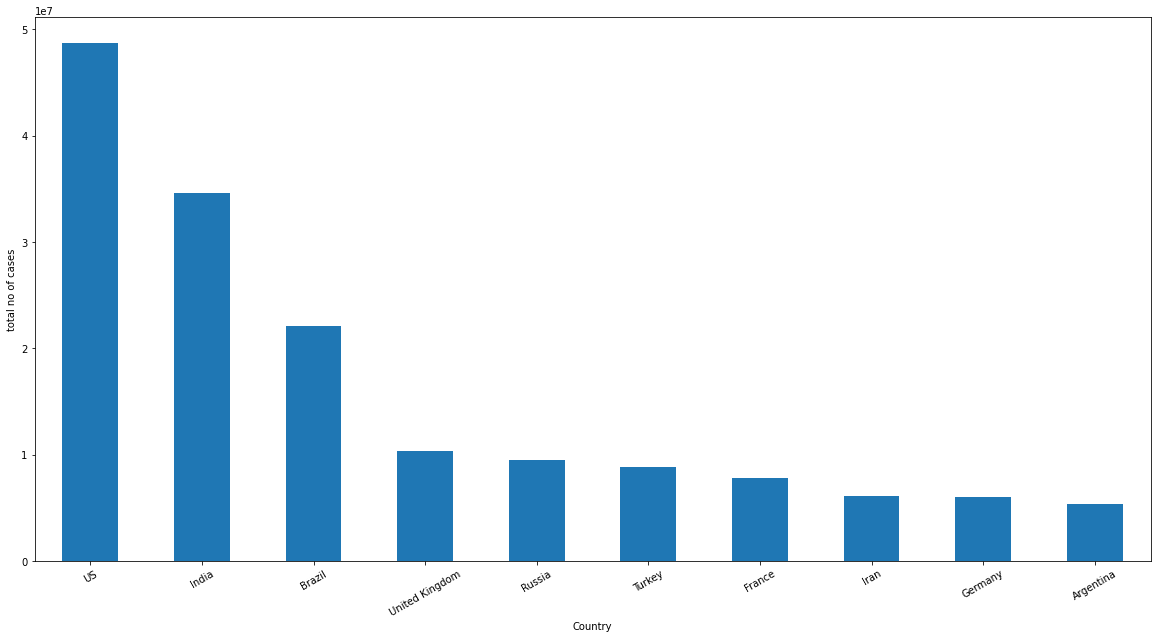

In [13]:
df1.iloc[-1].plot.bar(figsize=(20,10), rot=30)
plt.xlabel("Country")
plt.ylabel("total no of cases")
plt.show()

#### Resampling the DataFrame

Mean resampling the dataframe in a monthly time interval

In [14]:
df1.resample('M').mean()

Country/Region,US,India,Brazil,United Kingdom,Russia,Turkey,France,Iran,Germany,Argentina
2020-01-31,4.100000e+00,2.000000e-01,0.000000e+00,2.000000e-01,2.000000e-01,0.000000e+00,3.000000e+00,0.000000e+00,1.800000e+00,0.000000e+00
2020-02-29,1.386207e+01,2.896552e+00,1.724138e-01,2.089655e+01,2.000000e+00,0.000000e+00,1.606897e+01,5.575862e+01,1.934483e+01,0.000000e+00
2020-03-31,3.617597e+04,3.307097e+02,1.197645e+03,9.135452e+03,3.943226e+02,1.896000e+03,1.315916e+04,1.696603e+04,1.897352e+04,2.106129e+02
2020-04-30,6.650707e+05,1.492023e+04,3.495020e+04,1.109448e+05,3.764790e+04,6.994023e+04,1.152102e+05,7.519457e+04,1.314308e+05,2.585867e+03
2020-05-31,1.468781e+06,9.962884e+04,2.562673e+05,2.263455e+05,2.663578e+05,1.458616e+05,1.807156e+05,1.202577e+05,1.750908e+05,8.888903e+03
2020-06-30,2.164115e+06,3.650571e+05,9.387074e+05,2.737786e+05,5.365860e+05,1.809857e+05,1.974167e+05,1.916482e+05,1.890254e+05,3.637507e+04
2020-07-31,3.594144e+06,1.059022e+06,2.020705e+06,2.942065e+05,7.494529e+05,2.165404e+05,2.141999e+05,2.670757e+05,2.020993e+05,1.202829e+05
2020-08-31,5.367331e+06,2.668864e+06,3.319481e+06,3.204438e+05,9.196143e+05,2.498349e+05,2.629094e+05,3.426691e+05,2.266043e+05,2.981988e+05
2020-09-30,6.639914e+06,5.057839e+06,4.401999e+06,3.854835e+05,1.076305e+06,2.954999e+05,4.533403e+05,4.121994e+05,2.674507e+05,5.848661e+05
2020-10-31,8.111312e+06,7.375542e+06,5.193275e+06,7.097603e+05,1.372566e+06,3.453987e+05,9.281821e+05,5.265686e+05,3.759046e+05,9.652422e+05


Plotting the resampled dataframe

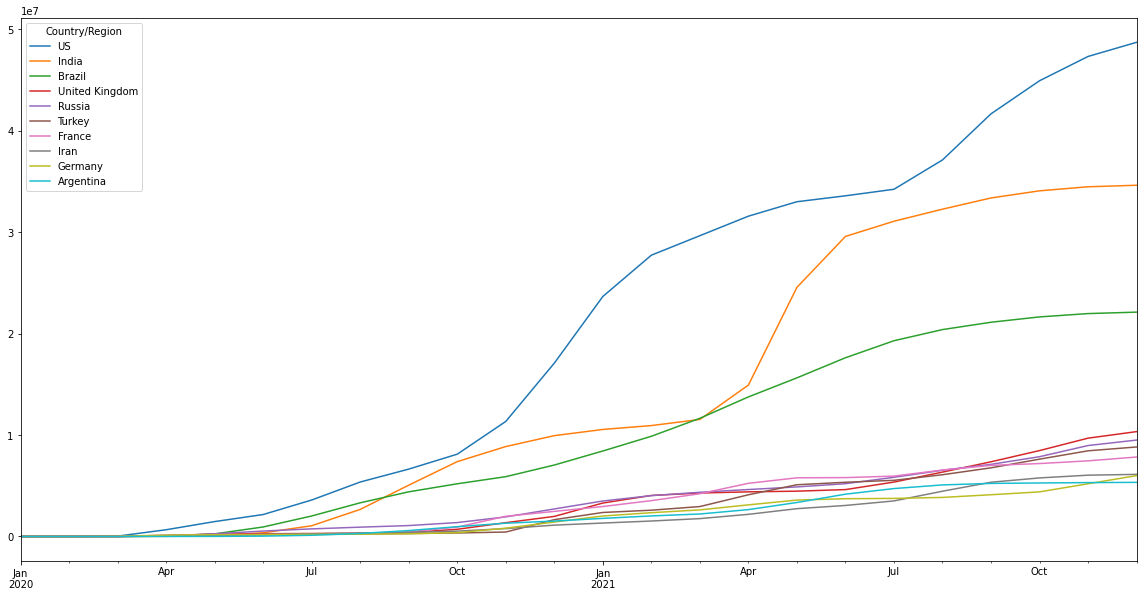

In [15]:
df1.resample('M').mean().plot(figsize=(20,10))

Finding *percentage change* in the number of confirmed cases in the top 10 countries in a monthly time interval

In [16]:
df1.resample('M').mean().pct_change()

Country/Region,US,India,Brazil,United Kingdom,Russia,Turkey,France,Iran,Germany,Argentina
2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-29,2.380992,13.482759,inf,103.482759,9.000000,NaN,4.356322,inf,9.747126,NaN
2020-03-31,2608.709116,113.173579,6945.341935,436.175077,196.161290,inf,817.917763,303.276398,979.805647,inf
2020-04-30,17.384325,44.115805,28.182433,11.144424,94.474877,35.888309,7.755130,3.432066,5.927068,11.277817
2020-05-31,1.208459,5.677432,6.332355,1.040163,6.074972,1.085518,0.568573,0.599287,0.332190,2.437495
2020-06-30,0.473408,2.664171,2.663002,0.209561,1.014530,0.240804,0.092417,0.593646,0.079585,3.092188
2020-07-31,0.660792,1.900976,1.152647,0.074615,0.396706,0.196451,0.085014,0.393573,0.069165,2.306741
2020-08-31,0.493355,1.520122,0.642734,0.089180,0.227047,0.153756,0.227402,0.283041,0.121252,1.479145
2020-09-30,0.237098,0.895128,0.326111,0.202968,0.170387,0.182781,0.724321,0.202908,0.180254,0.961329
2020-10-31,0.221599,0.458240,0.179754,0.841221,0.275258,0.168863,1.047429,0.277461,0.405510,0.650365


Plotting the percentage change. The first row simply contains *Nan* so it is ignored

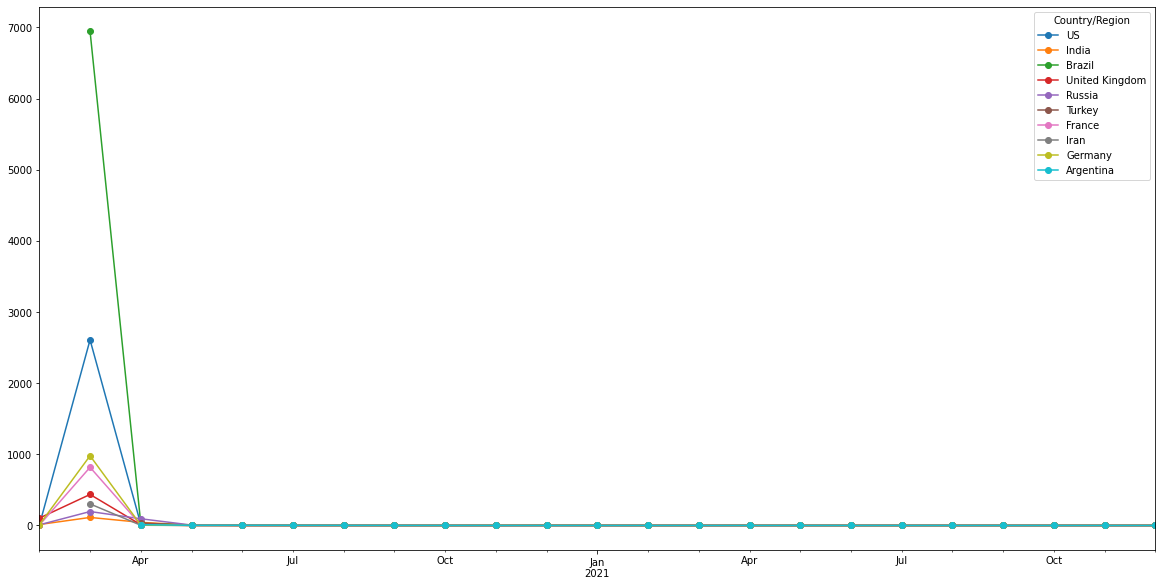

In [17]:
df1.resample('M').mean().pct_change().iloc[1:].plot(marker="o",figsize=(20,10))

# Analysing Covid19 data for United States 

Creating a new column for the total number of confirmed cases in the US

In [18]:
df_US = pd.DataFrame(index=df1.index, data=df1["US"].values, columns=["total cases in US"])
df_US

,total cases in US
2020-01-22,1
2020-01-23,1
2020-01-24,2
2020-01-25,2
2020-01-26,5
...,...
2021-11-27,48201079
2021-11-28,48241903
2021-11-29,48438876
2021-11-30,48555974


Plotting the total number of confirmed cases in the US

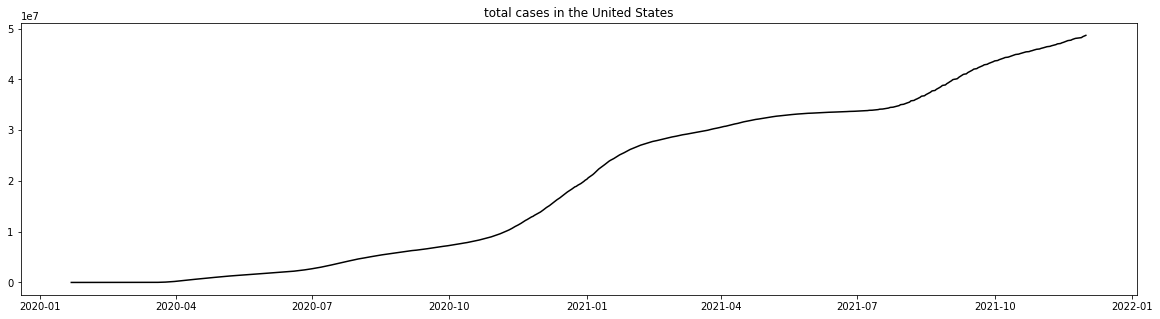

In [19]:
plt.figure(figsize=(20,5))
plt.plot(df_US.index, df_US["total cases in US"].values, color="black")
plt.title("total cases in the United States")
plt.show()

# Covid19 timeseries forecasting 

Preparing the training and testing data. Using the last 12 days as test data in this case

In [20]:
size = 12
train = df_US[:-size]
test = df_US[-size:]
print(f'Traning data: {len(train)} days \nTest data: {len(test)} days')

Traning data: 668 days 
Test data: 12 days


Scaling or normalizing the data using sklearn

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train)

train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

Generating training and test data in sequences using TimeseriesGerenator

In [22]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
seq_size = 5 #number of steps
n_features = 1 #number of features

train_generator = TimeseriesGenerator(train_scaled, train_scaled, length=seq_size, batch_size=1)
print(f"Original training data = {len(train)} days")
print(f"Actual training data = {len(train_generator)} days")

Original training data = 668 days
Actual training data = 663 days


In [23]:
test_generator = TimeseriesGenerator(test_scaled, test_scaled, length=seq_size, batch_size=1)
print(f"Original testing data = {len(test_scaled)} days")
print(f"Actual testing data = {len(test_generator)} days")

Original testing data = 12 days
Actual testing data = 7 days


Building the LSTM model for forecasting

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Activation

model = Sequential()
model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(seq_size, n_features)))
model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(seq_size, n_features)))
model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(seq_size, n_features)))
model.add(LSTM(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5, 128)            66560     
                                                                 
 lstm_5 (LSTM)               (None, 5, 128)            131584    
                                                                 
 lstm_6 (LSTM)               (None, 5, 128)            131584    
                                                                 
 lstm_7 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 383,361
Trainable params: 383,361
Non-tr

Training the model

In [29]:
history = model.fit(train_generator, 
                    validation_data=test_generator, 
                    epochs=100, steps_per_epoch=10)

Epoch 1/100
10/10 [==============================] - 5s 86ms/step - loss: 0.3161 - mse: 0.3161 - val_loss: 0.9244 - val_mse: 0.9244
Epoch 2/100
10/10 [==============================] - 0s 20ms/step - loss: 0.2017 - mse: 0.2017 - val_loss: 0.7494 - val_mse: 0.7494
Epoch 3/100
10/10 [==============================] - 0s 21ms/step - loss: 0.1019 - mse: 0.1019 - val_loss: 0.1815 - val_mse: 0.1815
Epoch 4/100
10/10 [==============================] - 0s 19ms/step - loss: 0.0294 - mse: 0.0294 - val_loss: 3.7407e-04 - val_mse: 3.7407e-04
Epoch 5/100
10/10 [==============================] - 0s 20ms/step - loss: 0.0313 - mse: 0.0313 - val_loss: 0.0494 - val_mse: 0.0494
Epoch 6/100
10/10 [==============================] - 0s 21ms/step - loss: 0.0492 - mse: 0.0492 - val_loss: 0.0882 - val_mse: 0.0882
Epoch 7/100
10/10 [==============================] - 0s 24ms/step - loss: 0.1285 - mse: 0.1285 - val_loss: 0.1214 - val_mse: 0.1214
Epoch 8/100
10/10 [==============================] - 0s 20ms/step - 

Plotting the training and validation loss for each epoch

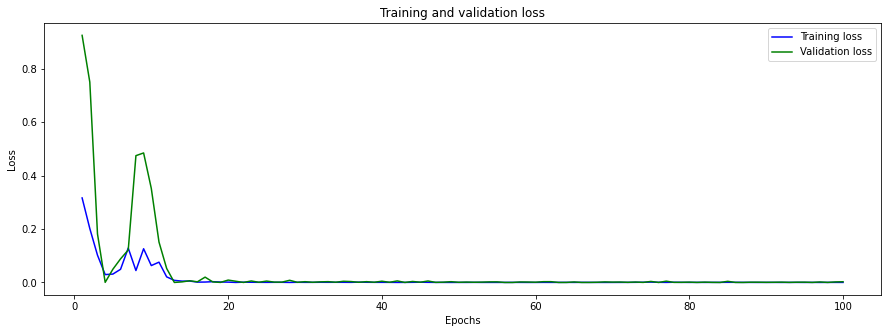

In [30]:
plt.figure(figsize=(15,5))
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Making the prediction

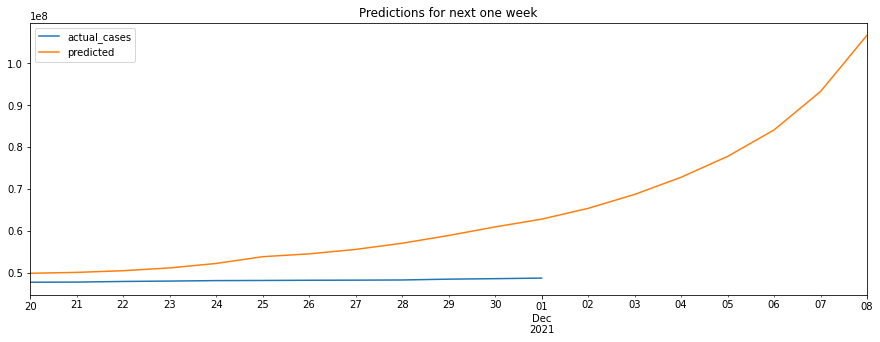

In [32]:
prediction = [] #Initializing an empty list for the predictions

current_batch = train_scaled[-seq_size:] #Final data points in train 
current_batch = current_batch.reshape(1, seq_size, n_features) #Reshape

future = 7 #predicting for next one week
for i in range(len(test) + future):
    current_pred = model.predict(current_batch)[0]
    prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

#Inverse transforming to before scaling in order to get the actual numbers
rescaled_prediction = scaler.inverse_transform(prediction)

time_series_array = test.index  #Getting the dates of the test data

#Adding the dates for the next one week forecast period
for j in range(0, future):
    time_series_array = time_series_array.append(time_series_array[-1:] + pd.DateOffset(1))

#Creating a dataframe to capture the forecast data
df_forecast = pd.DataFrame(columns=["actual_cases","predicted"], index=time_series_array)

df_forecast.loc[:,"predicted"] = rescaled_prediction[:,0]
df_forecast.loc[:,"actual_cases"] = test["total cases in US"]

#Plotting the predictions
df_forecast.plot(title="Predictions for next one week", figsize=(15,5))
plt.show()